# Data generation for the `iqs` and `iqs2` datasets

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

## IQs for one-sample test in Example 2 in Section 5.1

In [2]:
from scipy.stats import norm

n = 30
np.random.seed(50)
iqs = norm(loc=106, scale=15).rvs(n)
np.mean(iqs), np.std(iqs)

iqs = iqs.round(1)
iqs

array([ 82.6, 105.5,  96.7,  84. , 127.2,  98.8,  94.3, 122.1,  86.8,
        86.1, 107.9, 118.9, 116.5, 101. ,  91. , 130. , 155.7, 120.8,
       107.9, 117.1, 100.1, 108.2,  99.8, 103.6, 108.1, 110.3, 101.8,
       131.7, 103.8, 116.4])

In [3]:
np.mean(iqs), np.std(iqs, ddof=1)

(107.82333333333334, 16.082431694100315)

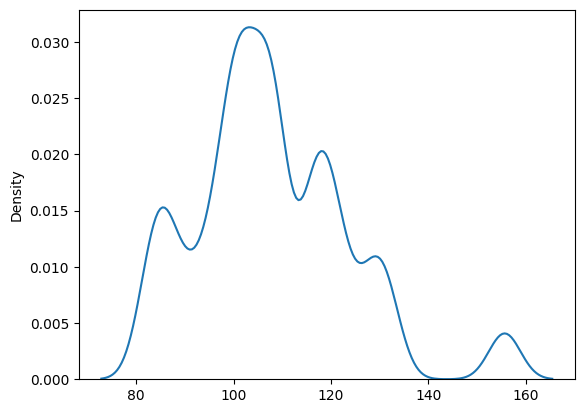

In [4]:
sns.kdeplot(iqs, bw_adjust=0.4);

In [5]:
iqs_df = pd.DataFrame({"iq":iqs})
iqs_df.to_csv("../datasets/exercises/iqs.csv", index=False)

## IQs for two-sample test in Example 1 in Section 5.3

In [6]:
treated = np.array([101, 100, 102, 104, 102,  97, 105, 105,  98, 101, 100, 123, 105,
                    103, 100,  95, 102, 106, 109, 102,  82, 102, 100, 102, 102, 101,
                    102, 102, 103, 103,  97,  97, 103, 101,  97, 104,  96, 103, 124,
                    101, 101, 100, 101, 101, 104, 100, 101])
controls = np.array([ 99, 101, 100, 101, 102, 100,  97, 101, 104, 101, 102, 102, 100,
                     105,  88, 101, 100, 104, 100, 100, 100, 101, 102, 103,  97, 101,
                     101, 100, 101,  99, 101, 100, 100, 101, 100,  99, 101, 100, 102,
                      99, 100,  99])
iqs2 = pd.DataFrame({
    "group": ["treat"]*len(treated) + ["ctrl"]*len(controls), 
    "iq": np.concatenate([treated, controls])
})

iqs2

,group,iq
0,treat,101
1,treat,100
2,treat,102
3,treat,104
4,treat,102
...,...,...
84,ctrl,100
85,ctrl,102
86,ctrl,99
87,ctrl,100


In [7]:
iqs2.groupby("group").describe()

iq                                                        
      count        mean       std   min    25%    50%    75%    max
group                                                              
ctrl   42.0  100.357143  2.516496  88.0  100.0  100.5  101.0  105.0
treat  47.0  101.914894  6.021085  82.0  100.0  102.0  103.0  124.0

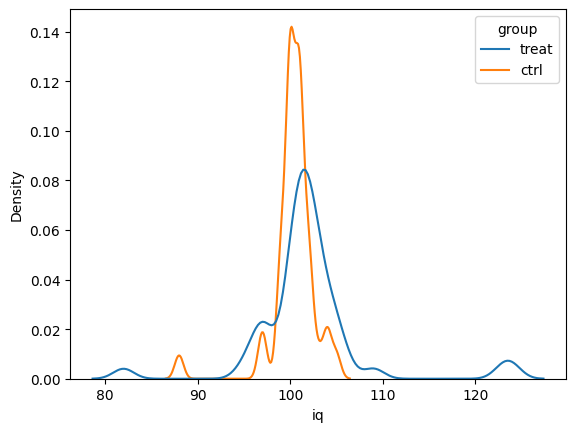

In [8]:
sns.kdeplot(x="iq", hue="group", bw_adjust=0.4, data=iqs2);

In [9]:
iqs2.to_csv("../datasets/exercises/iqs2.csv", index=False)